<a href="https://colab.research.google.com/github/thisaraniNJ/MachineLearning_CW/blob/main/MachineLearingCWbankfull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.4
    Uninstalling imbalanced-learn-0.12.4:
      Successfully uninstalled imbalanced-learn-0.12.4


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


Load the dataset

In [3]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ML CW/bank-full.csv', delimiter=";")

In [4]:
# Display the initial dataset structure
print("Dataset Overview: ")
print(df.info())

Dataset Overview: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [5]:
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [6]:
del df['duration']  #delete duration

Encode categorical variables

In [7]:
# Encode the target variable ('y') to binary (yes: 1, no: 0)
df['y'] = df['y'].map({
    'yes': 1,
    'no':0
})

In [8]:
# Identify categorical columns
categorical_columns =[
    "job", "marital", "education", "default", "housing", "loan",
    "contact", "month", "poutcome"
]

In [9]:
# Encode categorical columns using LabelEncoder
encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

Handle Missing values

In [10]:
# Check for missing values
print("\nMissing values in the dataset: ")
print(df.isnull().sum())


Missing values in the dataset: 
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


Feature Scaling

In [13]:
# Identify numerical columns
numerical_columns = [
    "age", "balance", "day","campaign","pdays","previous"
]

In [14]:
# Scale numerical columns using StandardScaler
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

Handle class imbalance

In [15]:
# Separate features and target variable
X = df.drop('y', axis=1)
y = df['y']

In [16]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

Train - Test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

In [18]:
# Display summary of the prepared dataset
print("\nTraining Dataset (X_train) Shape:", X_train.shape)
print("Test Dataset (X_test) Shape:", X_test.shape)
print("Training Target (y_train) Distribution:")
print(y_train.value_counts())
print("\nTest Target (y_test) Distribution:")
print(y_test.value_counts())


Training Dataset (X_train) Shape: (55890, 15)
Test Dataset (X_test) Shape: (23954, 15)
Training Target (y_train) Distribution:
y
0    27945
1    27945
Name: count, dtype: int64

Test Target (y_test) Distribution:
y
1    11977
0    11977
Name: count, dtype: int64


# Neural Network Model

Import necessary libraries

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

Define the neural network model

In [20]:
# Define the Neural Network Model
def build_nn_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # Define the input shape explicitly
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [21]:
# Initialize the model
input_dim = X_train.shape[1]  # Number of features
nn_model = build_nn_model(input_dim)

In [22]:
# Display model summary
print("\nNeural Network Model Summary:")
nn_model.summary()


Neural Network Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,369 (40.50 KB)

 Trainable params: 10,369 (40.50 KB)

 Non-trainable params: 0 (0.00 B)

Train the neural network model

In [23]:
batch_size = 8
epochs = 50

history = nn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1
)

Epoch 1/50
6987/6987 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6746 - loss: 0.6049 - val_accuracy: 0.7218 - val_loss: 0.5433
Epoch 2/50
6987/6987 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7219 - loss: 0.5542 - val_accuracy: 0.7263 - val_loss: 0.5317
Epoch 3/50
6987/6987 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.7305 - loss: 0.5389 - val_accuracy: 0.7354 - val_loss: 0.5232
Epoch 4/50
6987/6987 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7288 - loss: 0.5409 - val_accuracy: 0.7328 - val_loss: 0.5280
Epoch 5/50
6987/6987 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.7347 - loss: 0.5322 - val_accuracy: 0.7332 - val_loss: 0.5236
Epoch 6/50
6987/6987 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7304 - loss: 0.5388 - val_accuracy: 0.7356 - val_loss: 0.5222
Epoch 7/50
6987/6987 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7342 - loss: 0.5306 - val_accuracy: 0.7412 - val_loss: 0.5174
Epoch 8/50
6987/6987 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7390 - loss: 0

Evaluate the Neural Network

In [24]:
print("\nEvaluating the Neural Network Model on Test Data:")
loss, accuracy = nn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Evaluating the Neural Network Model on Test Data:
Test Loss: 0.4896
Test Accuracy: 0.7622


Generate predictions and metrics

In [25]:
y_pred = (nn_model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report for Neural Network:")
print(classification_report(y_test, y_pred))

749/749 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76     11977
           1       0.76      0.76      0.76     11977

    accuracy                           0.76     23954
   macro avg       0.76      0.76      0.76     23954
weighted avg       0.76      0.76      0.76     23954



# Random Forest Classification

Import Libraries

In [26]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

Define and train the model

In [27]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=5000,  # Number of trees
    max_depth=None,    # No limit on depth of the trees
    random_state=42    # Ensure reproducibility
)

In [28]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5000, random_state=42)

Evaluate the random forest model

In [29]:
print("\nEvaluating the Random Forest Model on Test Data:")
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}")

# Generate Classification Report
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


Evaluating the Random Forest Model on Test Data:
Random Forest Test Accuracy: 0.9362

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93     11977
           1       0.92      0.96      0.94     11977

    accuracy                           0.94     23954
   macro avg       0.94      0.94      0.94     23954
weighted avg       0.94      0.94      0.94     23954



# Comparison of the Neural Network and Random Forest Classifer

Import Necessary libraries

In [30]:
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

Generate Metrics for comparison

In [31]:
# Neural Network Predictions
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32").flatten()
nn_accuracy = accuracy_score(y_test, y_pred_nn)
nn_roc_auc = roc_auc_score(y_test, y_pred_nn)

749/749 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [32]:
# Random Forest Predictions
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)

In [33]:
# Display key metrics
print("\nModel Performance Comparison:")
print(f"Neural Network Test Accuracy: {nn_accuracy:.4f}, ROC-AUC: {nn_roc_auc:.4f}")
print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}, ROC-AUC: {rf_roc_auc:.4f}")



Model Performance Comparison:
Neural Network Test Accuracy: 0.8880, ROC-AUC: 0.8880
Random Forest Test Accuracy: 0.9362, ROC-AUC: 0.9362


Confusion Matrix


Confusion Matrices:


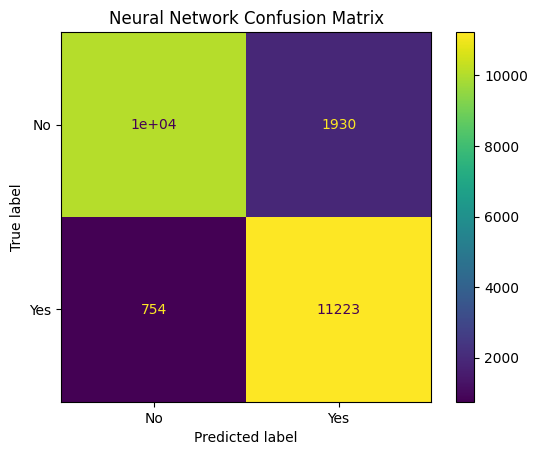

In [34]:
print("\nConfusion Matrices:")
# Neural Network Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
ConfusionMatrixDisplay(cm_nn, display_labels=['No', 'Yes']).plot()
plt.title("Neural Network Confusion Matrix")
plt.show()

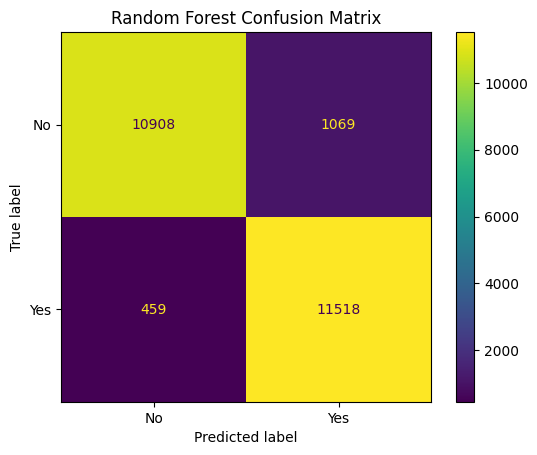

In [35]:
# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf, display_labels=['No', 'Yes']).plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

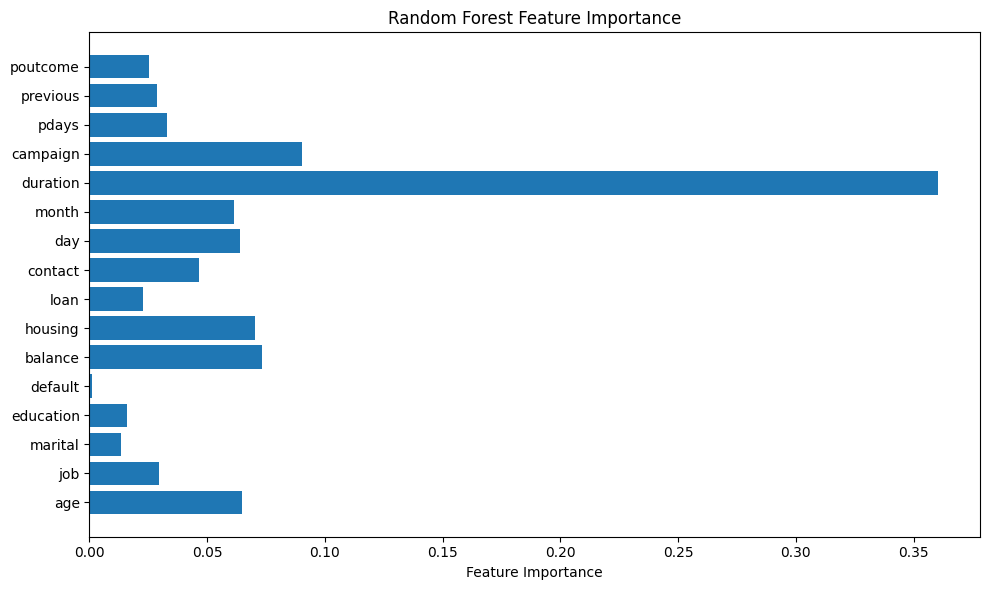

In [36]:
# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_importances)), feature_importances, align='center')
plt.yticks(np.arange(len(feature_importances)), X_train.columns)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


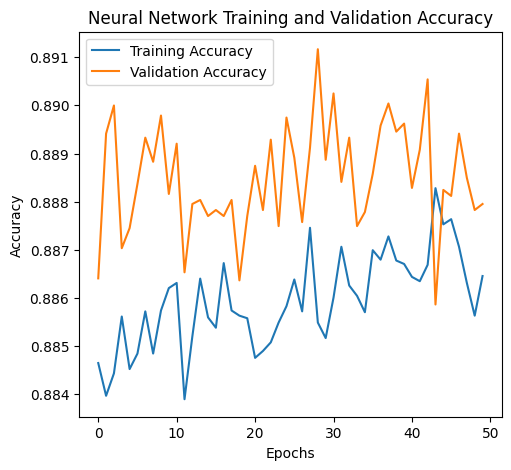

In [37]:
# Training vs Validation Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Neural Network Training and Validation Accuracy')
plt.legend()

In [ ]:
# Training vs Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Neural Network Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [39]:
# Print observations based on metrics
print("\nObservations:")
if nn_accuracy > rf_accuracy:
    print("The Neural Network outperformed the Random Forest in terms of accuracy.")
else:
    print("The Random Forest outperformed the Neural Network in terms of accuracy.")

if nn_roc_auc > rf_roc_auc:
    print("The Neural Network had a higher ROC-AUC, indicating better performance on imbalanced data.")
else:
    print("The Random Forest had a higher ROC-AUC, indicating better handling of imbalanced data.")




Observations:
The Random Forest outperformed the Neural Network in terms of accuracy.
The Random Forest had a higher ROC-AUC, indicating better handling of imbalanced data.
